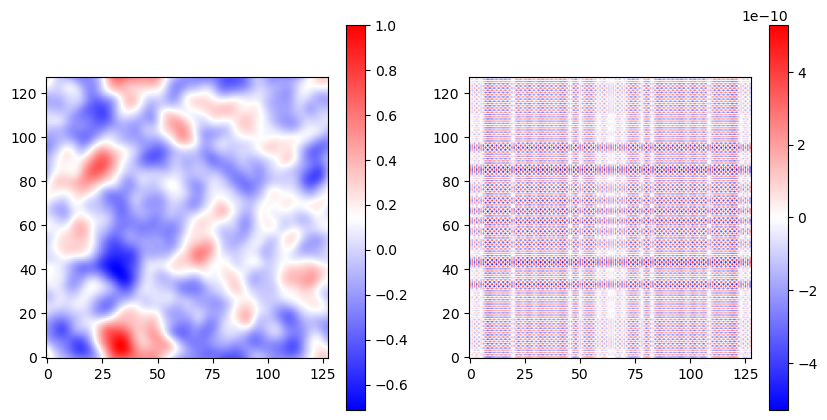

In [1]:
import sys
sys.path.append('../../modules')
import scipy.stats
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import grid_tools
l1 = 0.8e-6/(2*np.pi)
rbox = 1.5e-3
dx = 2*rbox/256/l1
N = (128,128)
k0 = .003
km = .01
kcx = np.pi/dx
kcy = np.pi/dx
kx = np.fft.ifftshift(grid_tools.cyclic_nodes(-kcx,kcx,N[0])).astype(np.double)
ky = np.fft.ifftshift(grid_tools.cyclic_nodes(-kcy,kcy,N[1])).astype(np.double)
k2 = np.outer(kx**2,np.ones(N[1])) + np.outer(np.ones(N[0]),ky**2)
screen = np.exp(-k2/km**2)*(0j+k2+k0**2)**(-11/6)
pos = lambda i : slice(1,int(N[i]/2))
neg = lambda i : slice(int(N[i]/2)+1,N[i])
crit = lambda i : int(N[i]/2)
screen *= np.random.random(N)-0.5 + 1j*np.random.random(N)-0.5j
screen[neg(0),neg(1)] = np.conj(screen[pos(0),pos(1)][::-1,::-1])
screen[neg(0),pos(1)] = np.conj(screen[pos(0),neg(1)][::-1,::-1])
screen[0,:] = 0
screen[:,0] = 0
screen[crit(0),:] = np.real(screen[crit(0),:])
screen[:,crit(1)] = np.real(screen[:,crit(1)])
screen = np.fft.ifft(np.fft.ifft(screen,axis=0),axis=1)
screen /= np.max(np.abs(screen))
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(np.real(screen),origin='lower',cmap='bwr')
plt.colorbar()
plt.subplot(122)
plt.imshow(np.imag(screen),origin='lower',cmap='bwr')
plt.colorbar()
plt.show()